# Project Python Foundations: FoodHub Data Analysis

### Import the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understand the data structure

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
df.shape

(1898, 9)

#### Observations: The DataFrame has a total of 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The various datatypes include int64, object, and float64. In addition, every column has an associated value, since there are 1898 non-null values in each column, and there are a total of 1898 rows in the DataFrame.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: As mentioned above in Question 2, there are no missing values in the data. Every row and column has a non-null value.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations: The mean food prep time is 27 minutes (rounded down). The fastest food prep time is 20 minutes. The longest food prep time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()['Not given']

736

#### Observations: 736 orders do not have a given rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## 1. Unique values for all variables

### Order ID

In [8]:
# returns the total number of unique orders
df['order_id'].nunique()

1898

#### Observations: There are a total of 1,898 delivery orders.

### Customer ID

In [9]:
# returns the total number of unique customers
df['customer_id'].nunique()

1200

#### Observations: There are 1,200 unique customers.

### Restaurant name

In [10]:
# returns total number of unique restaurants
df['restaurant_name'].nunique()

178

#### Observations: There are a total of 178 restaurants represented in the DataFrame.

### Cuisine type

In [11]:
# returns total number of unique cuisine types
df['cuisine_type'].nunique()

14

#### Observations: There are a total of 14 unique cuisine types represented in the DataFrame.

### Day of the week

In [12]:
# returns total number of unique days of the week values
df['day_of_the_week'].nunique()

2

#### Observations: There are 2 values that represent the day of the week the order is delivered. Either `weekday` or `weekend`.

### Rating

In [13]:
# returns total number of unique values for the order rating
df['rating'].nunique()

4

#### Observations: There are 4 unique values for the rating DataFrame.

## 2. Visual Plots

### Cuisine type count plot

<Axes: xlabel='cuisine_type', ylabel='count'>

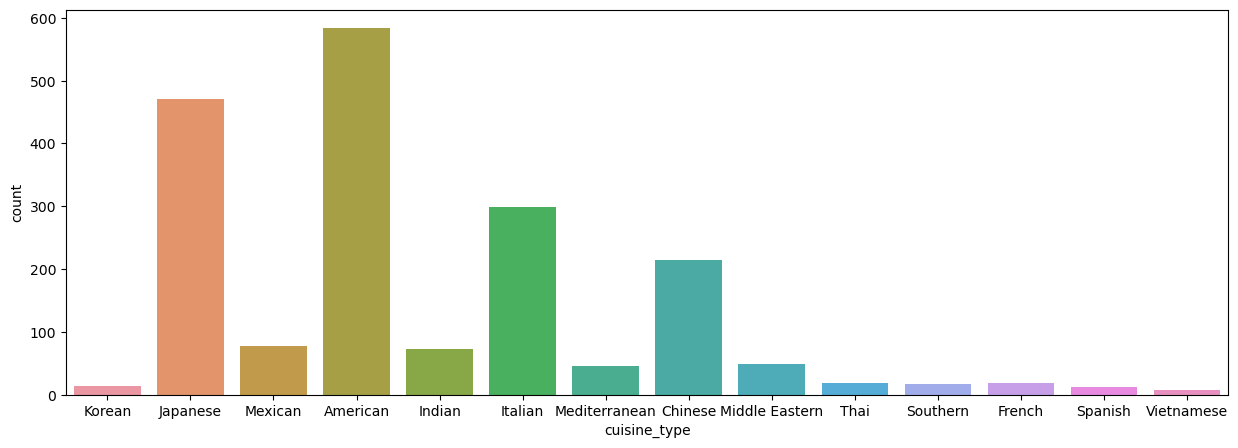

In [14]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

#### Observations: American food is the most ordered cuisine type with just under 600 orders. Japanese food is second, with almost 500 orders. Vietnamese food is the least ordered cuisine.

### Cost of the order histogram plot

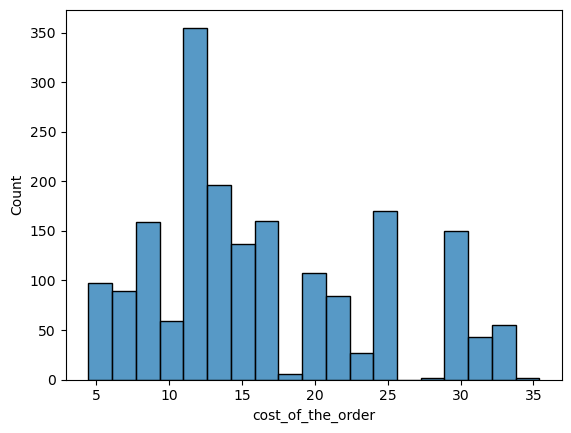

In [15]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations: Orders costing between 10 and 15 dollars occur with the greatest frequency.

### Cost of the order boxplot

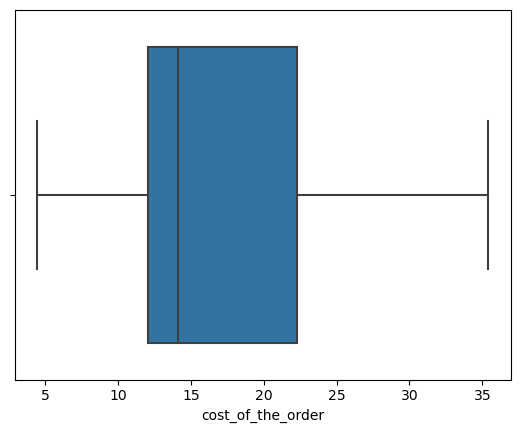

In [16]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations: The smallest order cost is just under $5, and the most expensive order is roughly $35. 50% of the orders are between $12 and $22, with the median order being $14. There are no outliers in the order cost data.

### Day of the week countplot

<Axes: xlabel='day_of_the_week', ylabel='count'>

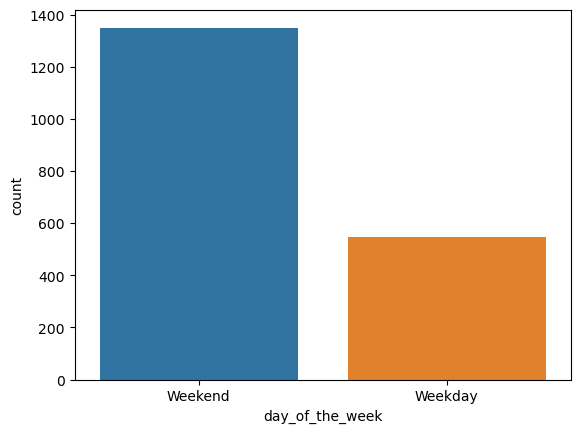

In [17]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Observations: There are more orders made on the weekend than weekdays. In the DataFrame, there are over 1,200 orders on the weekends, as compared to just under 600 on the weekdays.

### Rating countplot

<Axes: xlabel='rating', ylabel='count'>

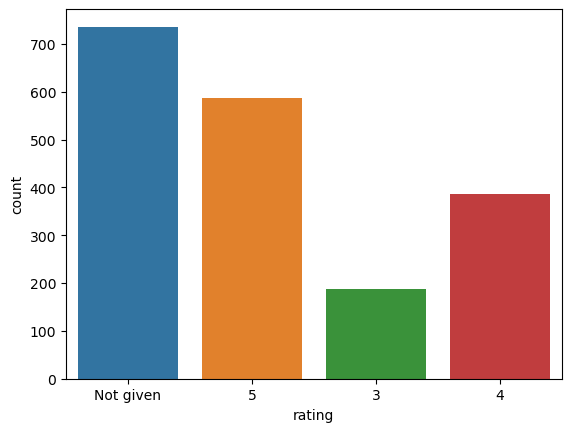

In [18]:
sns.countplot(data = df, x = 'rating')

#### Observations: The most common non-null rating is 5. The least common non-null rating is 3. Orders with no ratings are the most common out of all orders.

### Food prep time histogram plot


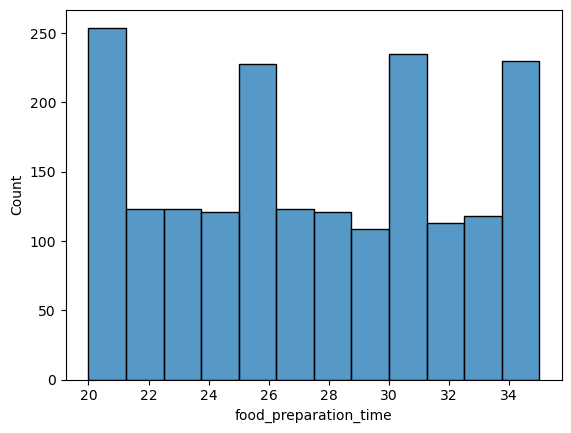

In [19]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()

#### Observations: The most common food preparation times are between 20-21 minutes, occurring 250 times in the DataFrame.

### Food prep time box plot

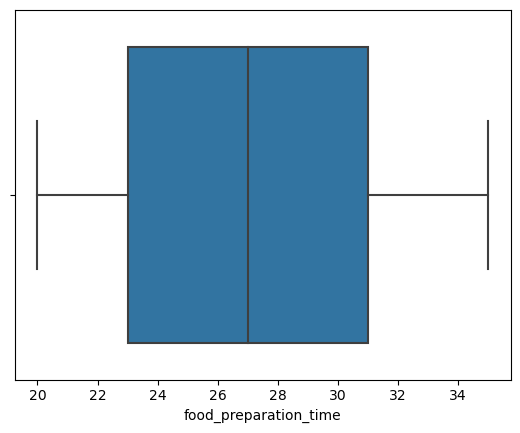

In [20]:
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations: The fastest food prep time is 20 minutes, while the longest is roughly 35 minutes. 50% of orders fall within 23 and 31 minutes of preparation time, and the median prep time is 27 minutes.

### Delivery time histogram plot

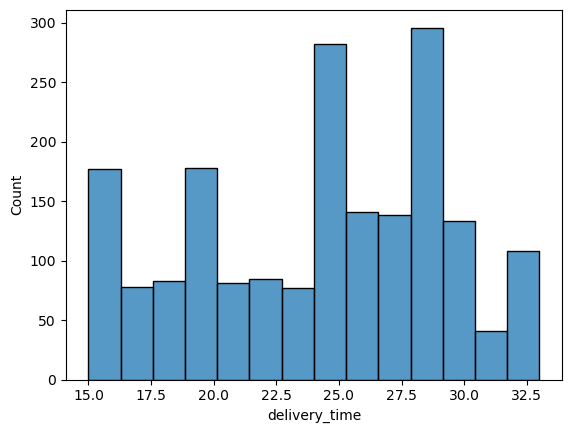

In [21]:
sns.histplot(data=df,x='delivery_time')
plt.show()

#### Observations: The most common delivery times are between 28 and 29 minutes, occurring 300 times in the DataFrame.

### Delivery time box plot

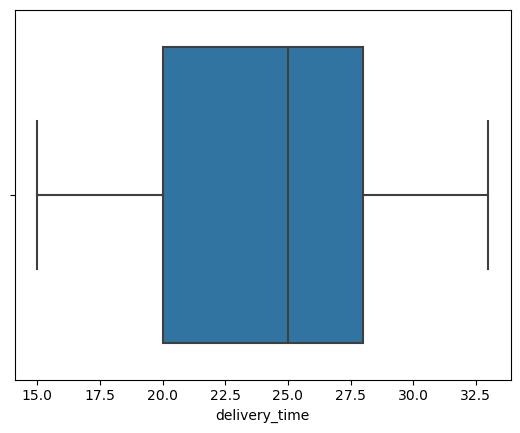

In [22]:
sns.boxplot(data=df,x='delivery_time')
plt.show()


#### Observations: The fastest delivery time is 15 minutes, and the longest delivery time is roughly 33 minutes. 50% of deliveries take place between 20 and 28 minutes, with the median delivery time being 25 minutes. There are no outliers in the delivery time data.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# get the restaurants with their order totals in descending order
restaurant_order_counts = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)

# print the top 5 restaurants with the highest number of orders
top_restaurants = restaurant_order_counts.head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations: The top 5 restaurants in terms of number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, respectively.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# create weekend-only data frame
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# group cuisine types by order count, in descending order
cuisine_order_counts = df_weekend.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False)

print(cuisine_order_counts)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: order_id, dtype: int64


#### Observations: The most popular cuisine on weekends is American food, followed by Japanese and Italian, respectively.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# create a variable to store the number of orders above $20
expensive_orders = df[df['cost_of_the_order'] > 20]

# calculate the percentage of expensive orders, by dividing it by the total number of orders
percent_expensive_orders = len(expensive_orders) / len(df) * 100

print(round(percent_expensive_orders), "%")

29 %


#### Observations: 29% of all orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# get mean delivery time
mean_del_time = df['delivery_time'].mean()

print(round(mean_del_time, 2))

24.16


#### Observations: The mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# get the counts of each customer_id, and return the first three rows
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: Customer #52832 has the most orders with 13, followed by customer #47440 with 10, and customer #83287 with 9.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


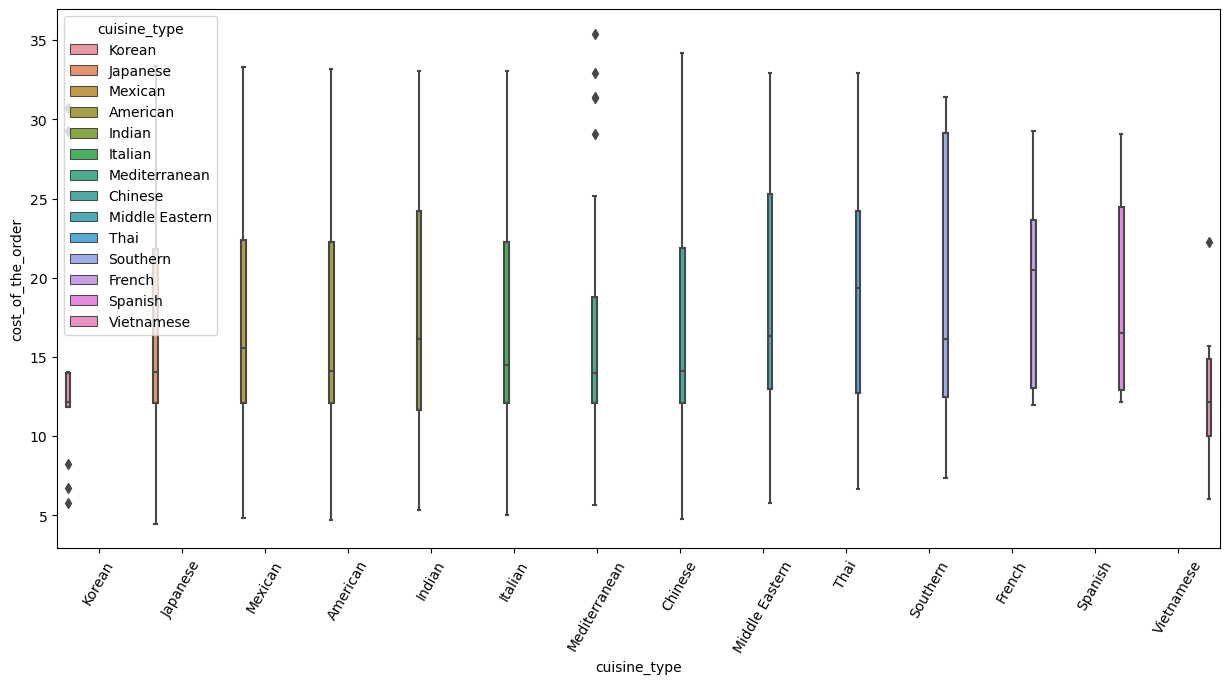

In [41]:
# boxplot to compare cost of the order vs cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, hue='cuisine_type')
plt.xticks(rotation = 60)

plt.show()

#### Observations: Chinese food has the highest variance between the least expensive and most expensive orders (not taking into account any outliers). Japanese, Mexican, and American food all have very similar interquartile ranges, meaning they all share very similar order cost data, in terms of the min, max, and 50% spread of data points. Korean food has the smallest interquartile range. Southern food has the largest interquartile range, despite having the most number of outliers. Mediterranean food has the two highest outlier data points in terms of total order cost. French food has the highest median order cost, and this is likely due to it having the second highest minimum order cost data point. Both Vietnamese and Korean food have the lowest median order costs, which is likely related to them both having low maximum order cost data points (notwithstanding any outliers).

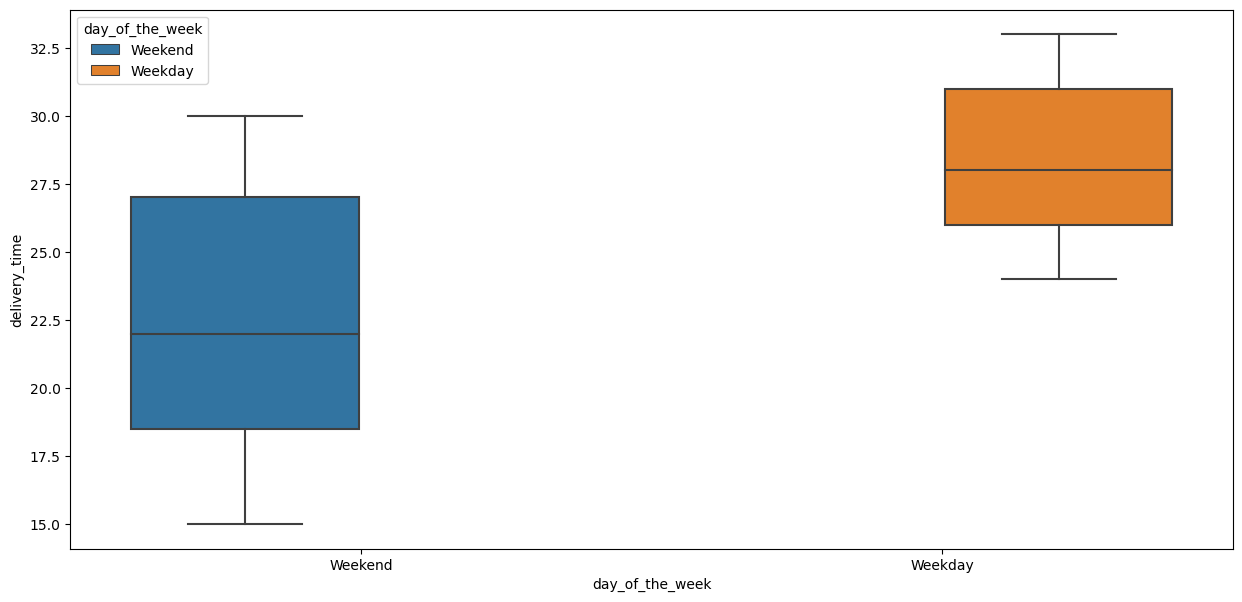

In [29]:
# boxplot to compare delivery time vs day of the week
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, hue='day_of_the_week')

plt.show()

#### Observations: Weekday delivery times have a smaller variance between the min and max values as compared to weekend deliveries. That said, the median weekday delivery time is higher than 75% of weekend delivery times. This is likely due to deliveries taking place during peak rush our times during the week, which is not the case for weekends. Notably, there are no outliers for both weekend and weekday delivery times.

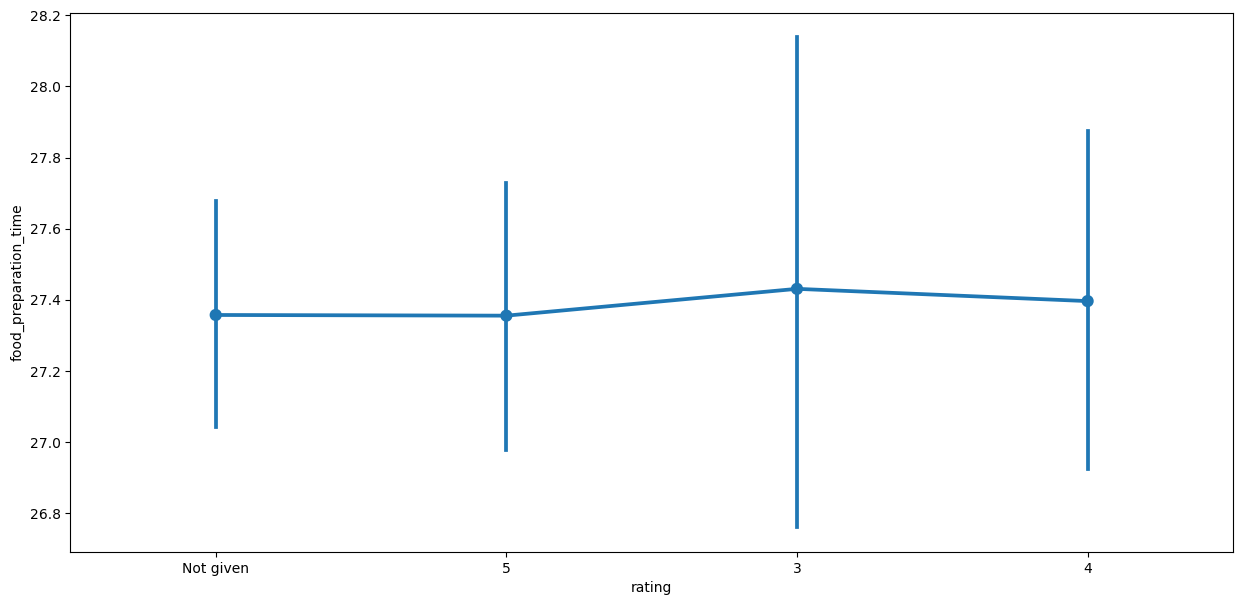

In [30]:
# pointplot to compare food prep time vs rating
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)

plt.show()

#### Observations: Ratings of 3 have the highest mean food preparation time, with a time of roughly 27.4 minutes. It also have the largest difference between the upper and lower bounds of the 95% confidence interval. Conversely, ratings of 4, 5 and 'Not given' have very similar mean food preparation times. The 'Not given' rating category has the smallest difference between the upper and lower bounds of its 95% confidence interval.

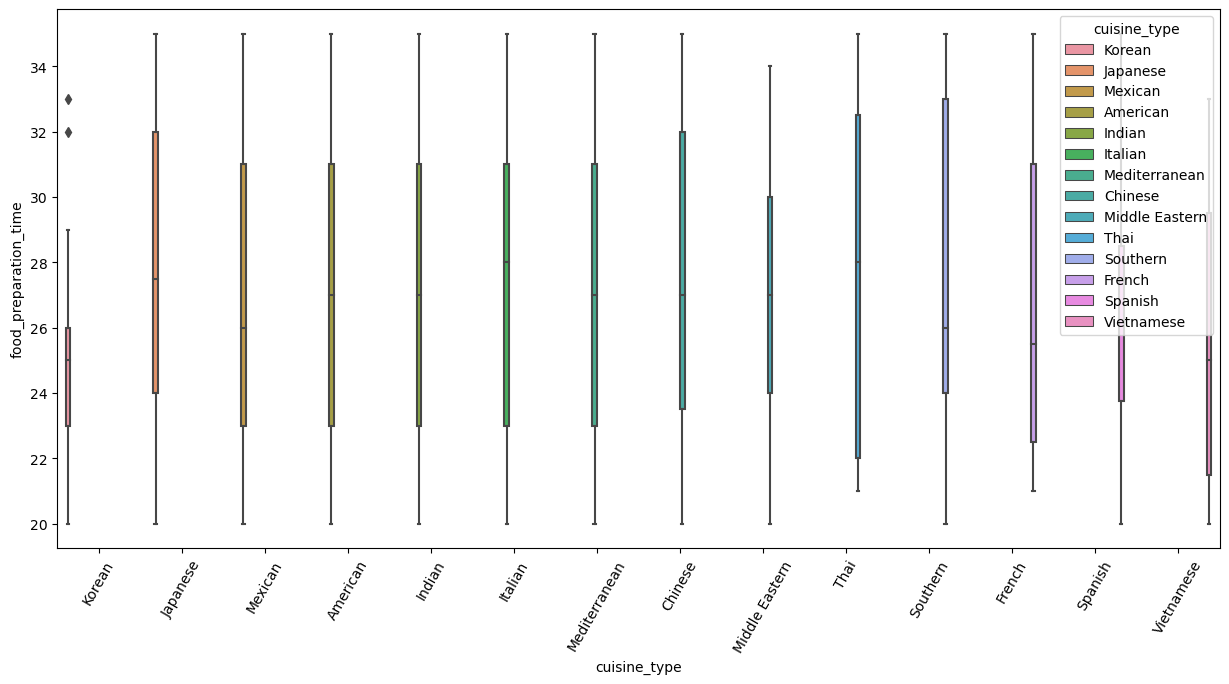

In [31]:
# boxplot to compare cuisine type vs food prep time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df, hue='cuisine_type')
plt.xticks(rotation = 60)

plt.show()

#### Observations: Thai food has the highest median food prep time, given that it has the highest maximum food prep time data point. Alternatively, Korean food has the lowest median food prep time, due to the fact that it has the lowest maximum food prep data point. Korean food is also the only cuisine type to have outliers in its food preparation time data, and in addition, has the smallest interquartile range. With the exception of a couple, virtually all cuisine types share a minimum preparation time of 20 minutes. Notably, American, Indian, Mediterranean, Chinese and Middle Eastern food all share the same median food prep time, which is roughly 27 minutes. All median food prep times across all cuisine types are between 24 and 28 minutes.

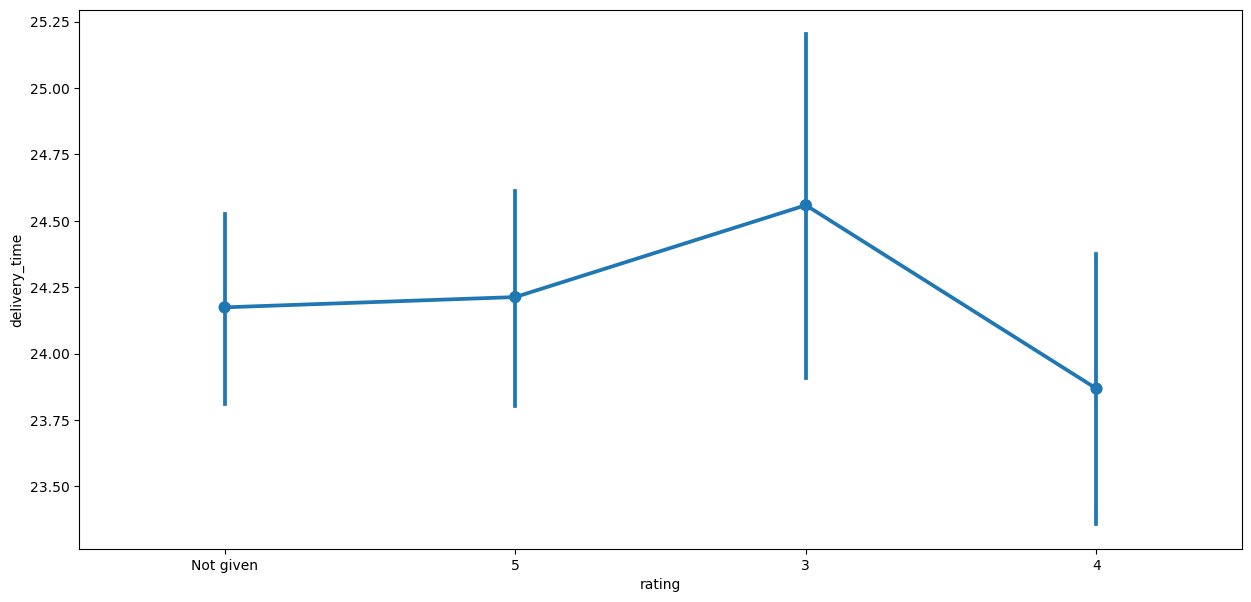

In [32]:
# pointplot to compare rating vs delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)

plt.show()

#### Observations: A rating of 3 has the highest mean delivery time. This makes sense given that longer delivery times are likely to result in lower ratings. However, a rating of 4 has the lowest mean delivery time, despite not being the highest possible rating. The rating category of 'Not given' has the smallest difference between the upper and lower bounds of its 95% confidence interval.

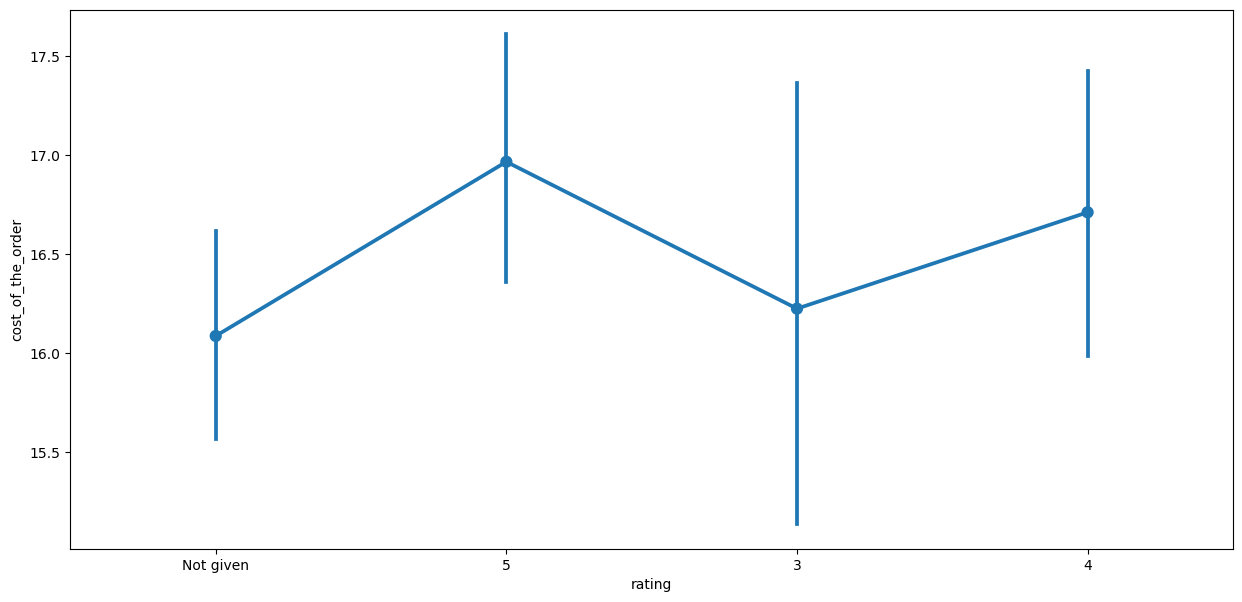

In [33]:
# pointplot to compare rating vs cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)

plt.show()

#### Observations: Ratings of 5 have the highest mean cost of the order. Ratings of 3 have the highest difference between the upper and lower bounds of of its 95% confidence interval. The rating category of 'Not given' has the lowest mean cost of the order.

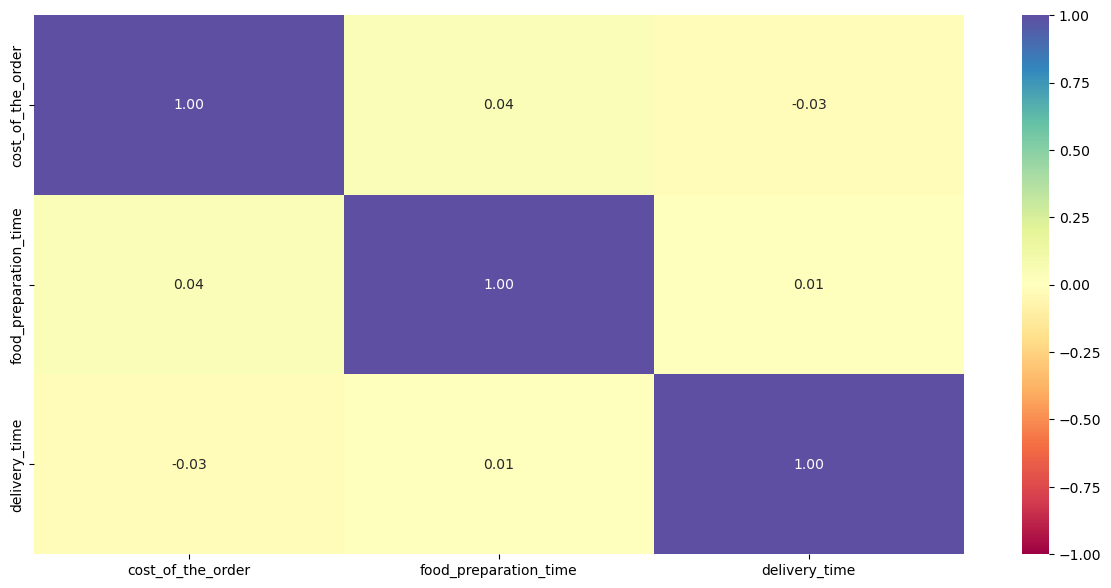

In [34]:
# heatmap to compare cost of the order, food prep time, and delivery time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

#### Observations: Food preparation time and cost of the order are the most correlated columns in the dataset, with a value of `0.04`. The second-most correlated variables are food preparation time and delivery time, with a value of `0.01`. These two variables are closely related, given that the delivery time is a function of both the food prep time and the time it takes for the food to be transported to the customer.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# create a DataFrame with all restaurants that have a rating
rated = df[df['rating'] != 'Not given'].copy()

# convert rating column from object to integer
rated['rating'] = rated['rating'].astype('int')  

# create a DataFrame with restaurant names and their ratings
rest_ratings = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rest_ratings.head()

# return restaurant names with more than 50 ratings
restaurants = rest_ratings[rest_ratings['rating'] > 50]['restaurant_name']

# return data of restaurants with more than 50 ratings
mean_rating = rated[rated['restaurant_name'].isin(restaurants)].copy()

# group the mean rating of each restaurant by grouping restaurant names and their ratings 
mean_rating.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi are top 4 restaurants with an average rating greater than 4 with a minimum of 50 ratings. These 4 restaurants are all available for the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
# function to compute revenue depending upon cost of the order
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [37]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print(round(total_rev, 2))

6166.3


#### Observations: The net revenue is roughly $6,166.3 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
# get total delivery time and add it as a new column to the DataFrame
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# percentage of orders that have more than 60 minutes of total delivery time
total_orders = len(df)
more_than_60 = len(df[df['total_time'] > 60])
percent_more_than_60 = (more_than_60 / total_orders) * 100

print(round(percent_more_than_60, 2))

10.54


#### Observations: The percentage of orders with more than 60 minutes of total delivery time is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
# return mean delivery time for weekdays and weekends

weekday_mean = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
weekend_mean = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

print('Mean delivery time on weekdays:', weekday_mean, 'minutes')
print('Mean delivery time on weekends:', weekend_mean, 'minutes')

Mean delivery time on weekdays: 28 minutes
Mean delivery time on weekends: 22 minutes


#### Observations: The mean delivery time on weekdays and weekends is 28 minutes and 22 minutes, respectively.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Ratings and delivery time are related, due to the lowest possible rating of 3 having the highest mean delivery time. The delivery time is a key aspect of the customer experience when ordering food. Additionally, each cuisine type has a varying distribution of food preparation times, which is a key factor in the overall delivery time. That is to say, the cuisine type can have an impact on the rating, given its impact on the food preparation time. In addition, the day of the week the order is made can affect the delivery times. The mean delivery time on weekdays is higher than the mean delivery time on weekends. From a correlation standpoint, food preparation time and order cost are the most highly correlated variables. This makes sense from a business standpoint, because restaurants must fulfill as many orders as they can. If the food preparation time is high, that limits the total number of orders they can fulfil, so they make up for it in increased prices.

### Recommendations:

*  To improve profitability, I would recommend promoting specific types of cuisine types that are efficient to prepare while also commanding a higher price. This would result in faster delivery times, allowing for more total orders to be processed, while keeping the same level of delivery drivers, leading to greater profit. Doing such a promotion on the weekend would be optimal, given the lack of rush hour traffic. In addition, the faster delivery times would likely lead to higher ratings as a result. For example, French food has a relatively lower median food preparation time, with the highest median order cost. This cuisine would be a good candidate for such a promotion.

---